In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot, plot
import plotly.express as px
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv(r'C:\Users\hello\Desktop\Projects\Hotel_Booking/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.shape

(119390, 32)

In [7]:
df.duplicated().sum()

31994

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(87396, 32)

In [10]:
filter1 = (df['adults'] ==0) & (df['children'] ==0) & (df['babies'] ==0)

In [11]:
df = df[~filter1]

In [12]:
df.shape

(87230, 32)

**EDA**

Bookings from different countries

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
df_country = df['country'].value_counts().reset_index()

In [15]:
px.choropleth(data_frame=df_country, locations= 'country', hover_name='country', color='count', color_continuous_scale='blues')

In [16]:
# Bookings are mainly from European countries, with Portugal has the most bookings

Descriptive analysis of lead time, total special request and average daily rate (adr)

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
np.percentile (df['adr'], 90)

174.0

In [19]:
for col in ['adr', 'lead_time', 'total_of_special_requests']:
    print('Feature: ', col)
    
    for i in range (90,101):
        percentile_value = np.percentile(df[col], i).round(0)
        print('{}th percentile is {}'.format(i, percentile_value))
    print('\n')

Feature:  adr
90th percentile is 174.0
91th percentile is 179.0
92th percentile is 185.0
93th percentile is 190.0
94th percentile is 197.0
95th percentile is 204.0
96th percentile is 213.0
97th percentile is 225.0
98th percentile is 239.0
99th percentile is 262.0
100th percentile is 5400.0


Feature:  lead_time
90th percentile is 204.0
91th percentile is 212.0
92th percentile is 220.0
93th percentile is 230.0
94th percentile is 241.0
95th percentile is 256.0
96th percentile is 272.0
97th percentile is 291.0
98th percentile is 315.0
99th percentile is 347.0
100th percentile is 737.0


Feature:  total_of_special_requests
90th percentile is 2.0
91th percentile is 2.0
92th percentile is 2.0
93th percentile is 2.0
94th percentile is 2.0
95th percentile is 2.0
96th percentile is 2.0
97th percentile is 3.0
98th percentile is 3.0
99th percentile is 3.0
100th percentile is 5.0




In [20]:
#adr has Outliner as 99th Percentile is 262 while 100th percentile is 5400

Difference between reserved and assigned room type

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
df_room_type = pd.crosstab(index = df['reserved_room_type'], columns= df['assigned_room_type'], margins=True, normalize='index')*100

In [23]:
df_room_type

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.242469,1.580551,2.220214,11.343823,1.832164,0.691048,0.311858,0.166560,0.363243,0.248069,0.000000
B,10.642570,87.550201,0.000000,0.502008,0.200803,0.200803,0.803213,0.000000,0.000000,0.100402,0.000000
C,0.547046,0.218818,94.748359,0.656455,0.437637,0.218818,1.094092,0.984683,1.094092,0.000000,0.000000
D,1.697744,0.155387,0.184162,91.960175,3.781077,1.145258,0.471915,0.051796,0.385589,0.166897,0.000000
E,0.248509,0.033135,0.099404,0.364480,90.424122,6.345262,1.607025,0.066269,0.662691,0.149105,0.000000
F,0.212766,0.496454,0.000000,0.141844,1.099291,93.475177,4.007092,0.106383,0.354610,0.106383,0.000000
G,0.243902,0.048780,0.097561,0.000000,0.195122,0.682927,97.512195,0.341463,0.731707,0.146341,0.000000
H,0.000000,0.000000,0.000000,0.167785,0.000000,0.000000,1.677852,97.147651,1.006711,0.000000,0.000000
L,16.666667,16.666667,16.666667,0.000000,0.000000,16.666667,0.000000,16.666667,0.000000,0.000000,16.666667


In [24]:
# There is difference between reserved and assigned room type - Guests can't always get what they booked for
# No one has booked I & K room type
# Most room types have more than 80% possibility of the assignment of original reservation type
# Except L room type with only 16.7% 

Bookings by market segment

In [25]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
from matplotlib.ticker import PercentFormatter

In [27]:
df_market_segment = df['market_segment'].value_counts().to_frame()

In [28]:
df_market_segment

,count
market_segment,
Online TA,51553
Offline TA/TO,13855
Direct,11780
Groups,4922
Corporate,4200
Complementary,692
Aviation,226
Undefined,2


Text(0.5, 1.0, 'Total Bookings From Different Market Segments')

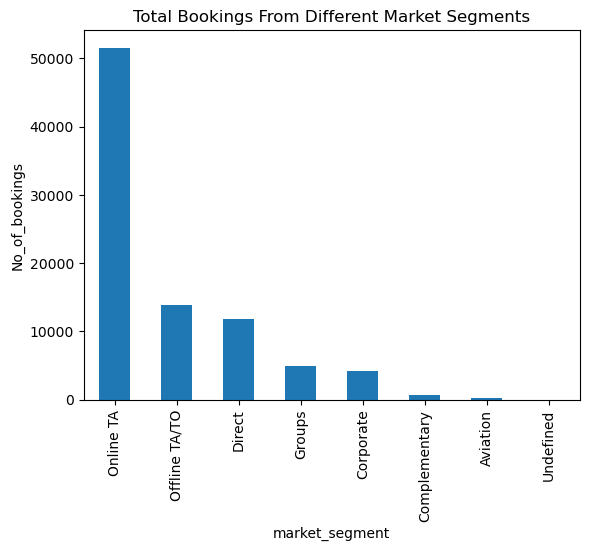

In [29]:
fig1 = df_market_segment.plot(kind ='bar', ylabel = 'No_of_bookings')
fig1.legend().remove()
fig1.set_title('Total Bookings From Different Market Segments')

adr per room type per market segment

<AxesSubplot:xlabel='market_segment', ylabel='adr'>

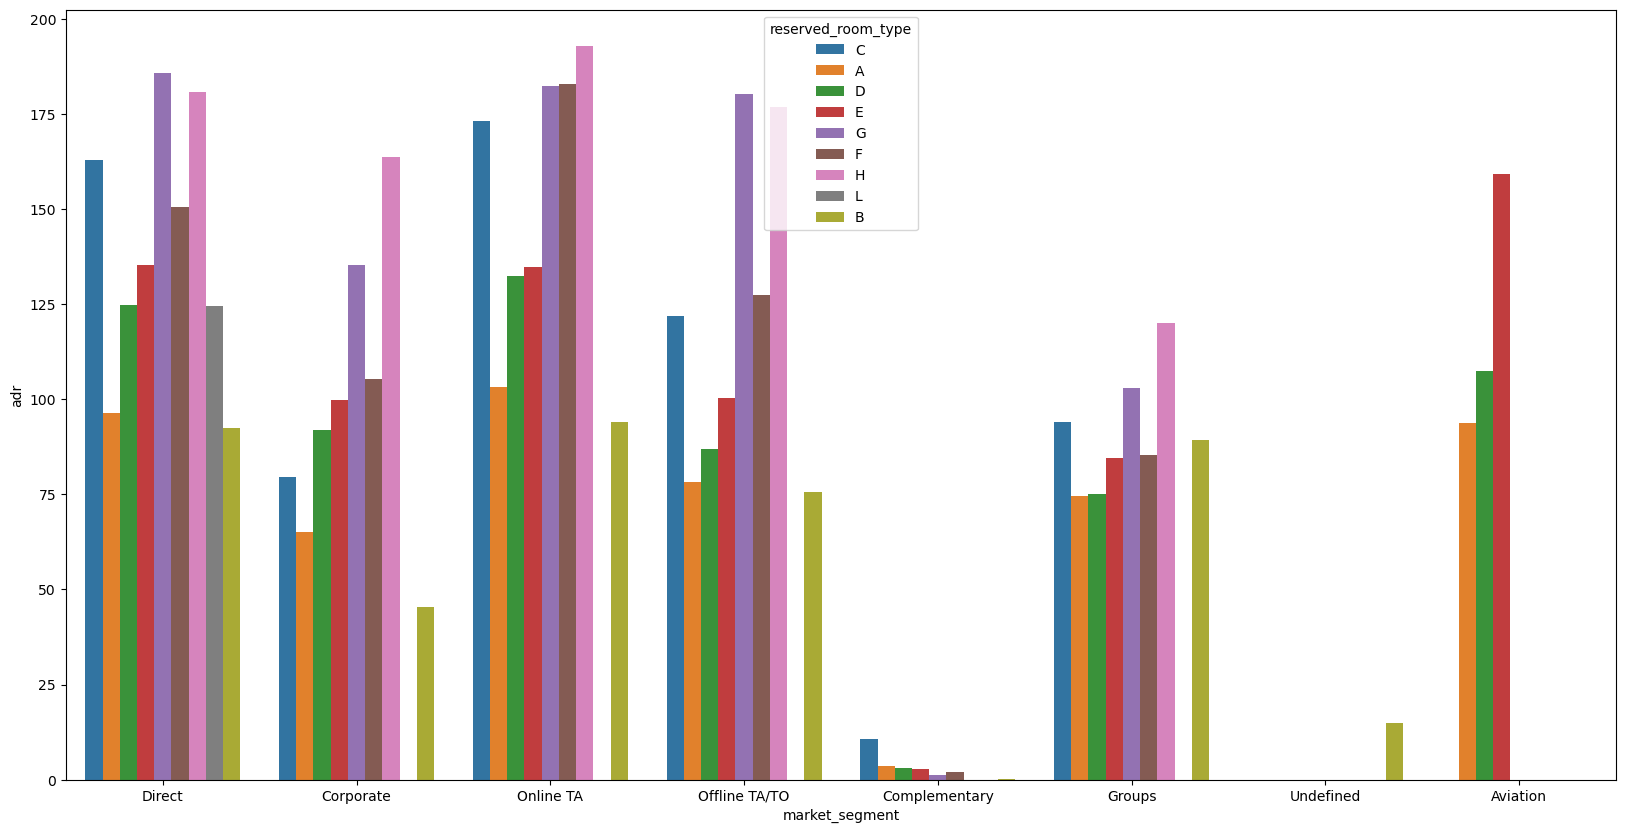

In [30]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'market_segment', hue = 'reserved_room_type', y = 'adr', ci = None)

In [31]:
# In popular market segments, G & H room types have the highest adr

Total guest arrival per day

In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [33]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [34]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [35]:
df['arrival_month'] = df['arrival_date_month'].map(dict_month)

In [36]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df ['arrival_date_day_of_month'].astype(str)

In [37]:
df['total_guest_arrival'] = df['adults'] + df['children'] + df['babies']

In [38]:
df['total_guest_arrival']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_guest_arrival, Length: 87230, dtype: float64

In [39]:
df_no_cancel = df[df['is_canceled']==0]

Text(0.5, 1.0, 'Total Arrival Guest by Month')

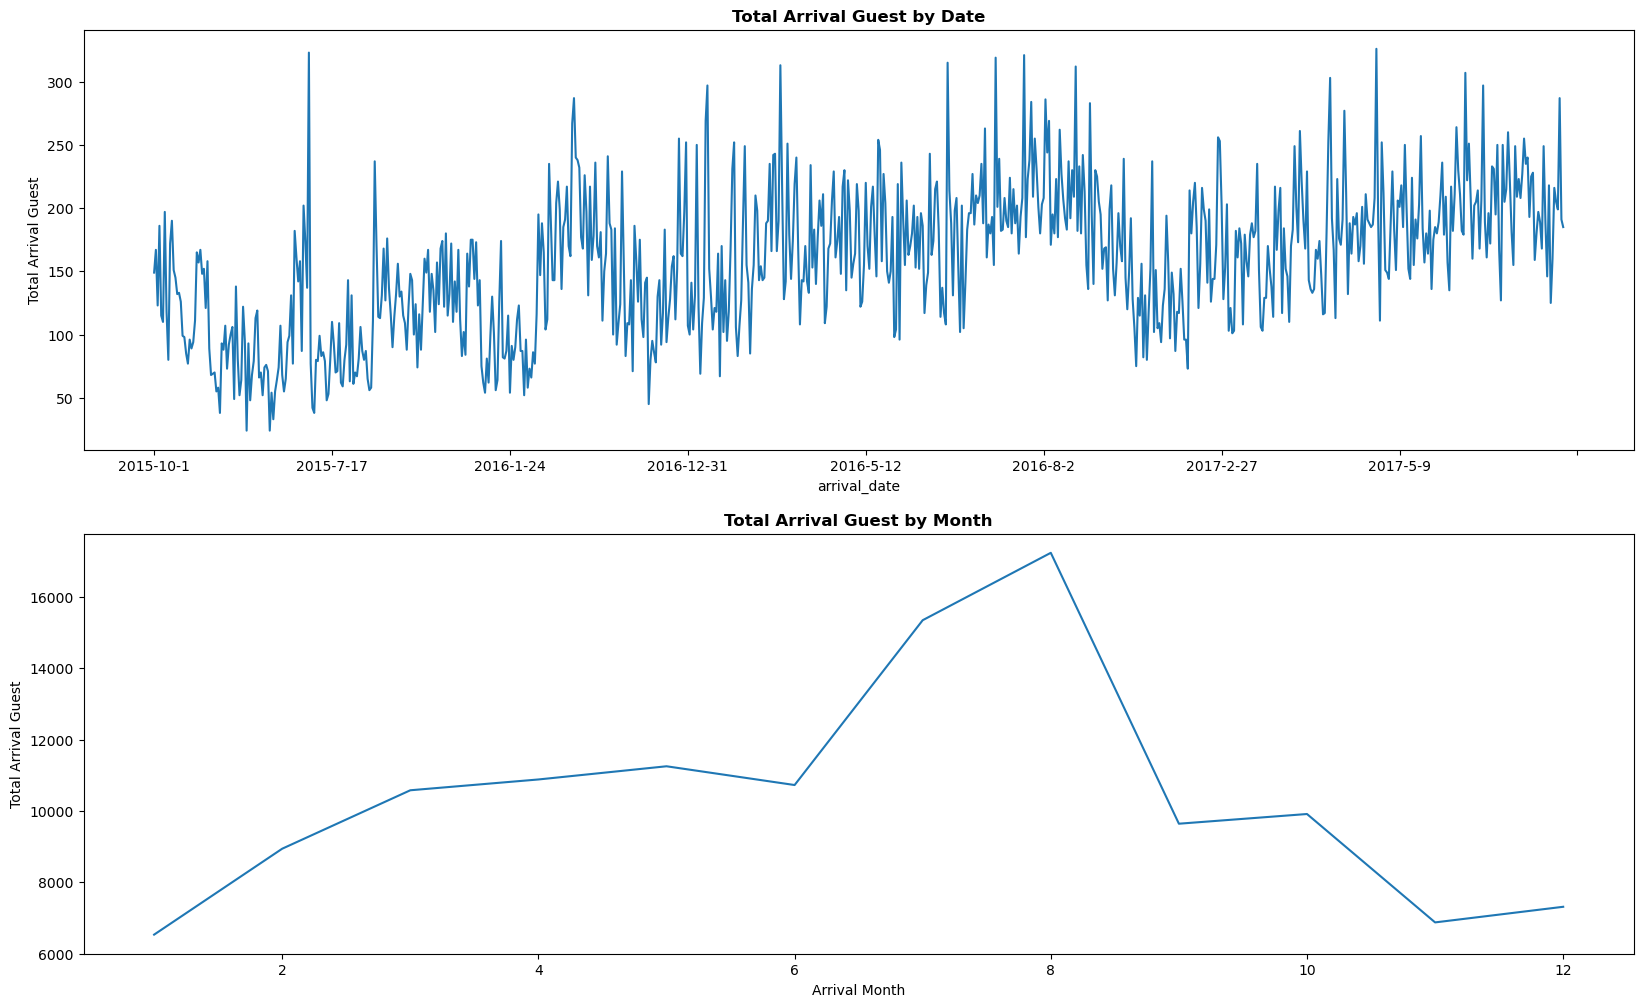

In [40]:
plt.figure(figsize = (20,12))

plt.subplot(2,1,1)
df_no_cancel.groupby('arrival_date')['total_guest_arrival'].sum().plot()
plt.ylabel('Total Arrival Guest')
plt.title('Total Arrival Guest by Date', fontdict = {'fontsize':12, 'fontweight':'bold'})

plt.subplot(2,1,2)
df_no_cancel.groupby('arrival_month')['total_guest_arrival'].sum().plot()
plt.xlabel('Arrival Month')
plt.ylabel('Total Arrival Guest')
plt.title('Total Arrival Guest by Month', fontdict = {'fontsize':12, 'fontweight':'bold'})



In [41]:
#There is no obvious trend of total arrival guest by date
#But we can see from the second line chart that summer is the busiet season, with Aug reaches its peak of arrival guests

Total Guest Arrival Distribution

In [42]:
df_no_cancel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_month',
       'arrival_date', 'total_guest_arrival'],
      dtype='object')

In [51]:
guest_arrival = df_no_cancel.groupby('arrival_date')['total_guest_arrival'].sum().to_frame()

In [52]:
guest_arrival

,total_guest_arrival
arrival_date,
2015-10-1,149.0
2015-10-10,167.0
2015-10-11,123.0
2015-10-12,186.0
2015-10-13,115.0
...,...
2017-8-5,205.0
2017-8-6,199.0
2017-8-7,287.0


In [57]:
px.histogram(guest_arrival['total_guest_arrival'], nbins=20)

In [58]:
px.histogram(guest_arrival_series['total_guest_arrival'])

In [60]:
np.mean(guest_arrival['total_guest_arrival'])

157.92559899117276

In [61]:
np.median(guest_arrival['total_guest_arrival'])

158.0

In [65]:
std = np.std(guest_arrival['total_guest_arrival'])

In [63]:
mean = np.mean(guest_arrival['total_guest_arrival'])

In [66]:
mean-std*2, mean+ std*2

(44.960324938957015, 270.8908730433885)

In [67]:
mean-std, mean+ std

(101.44296196506488, 214.40823601728064)

In [ ]:
# median is almost equal to mean, which means the ditrsibution of total guests is almost symmetric 
# 68% of distribution falls between 101 and 214
# 95.2% of distribution falls between 45 and 271